In [73]:
import pandas as pd 
from pathlib import Path
import seaborn as sns
import hvplot.pandas
import numpy as np
import warnings

warnings.filterwarnings("ignore")

In [74]:
data_path = Path("../data/energy_data/clean_data/energy_btc_data.csv")
data_df = pd.read_csv(data_path)
data_df.sort_values(by=["Date"], inplace=True)
data_df['DateTime'] = pd.to_datetime(data_df['Date'].astype(str), format='%Y%m%d')
data_df.head()

,Date,BTC,CL Fut,CL Spot,NG Fut,NG Spot,DateTime
255,20191031,10188.04,54.18,54.02,2.633,2.73,2019-10-31
254,20191101,9600.08,56.20,56.04,2.714,2.54,2019-11-01
253,20191104,9610.05,56.54,56.33,2.821,2.77,2019-11-04
252,20191105,9695.66,57.23,57.04,2.862,2.77,2019-11-05
251,20191106,9668.23,56.35,56.15,2.828,2.82,2019-11-06


In [75]:
data_df.set_index(data_df["DateTime"], inplace=True)
data_df.drop(columns=["Date", "DateTime"], inplace=True)
# data_df.drop(columns=["CL Fut", "CL Spot"], inplace=True)
# data_df.drop("2020-04-20", inplace=True)
data_df.head()

,BTC,CL Fut,CL Spot,NG Fut,NG Spot
DateTime,,,,,
2019-10-31,10188.04,54.18,54.02,2.633,2.73
2019-11-01,9600.08,56.20,56.04,2.714,2.54
2019-11-04,9610.05,56.54,56.33,2.821,2.77
2019-11-05,9695.66,57.23,57.04,2.862,2.77
2019-11-06,9668.23,56.35,56.15,2.828,2.82


<AxesSubplot:xlabel='DateTime'>

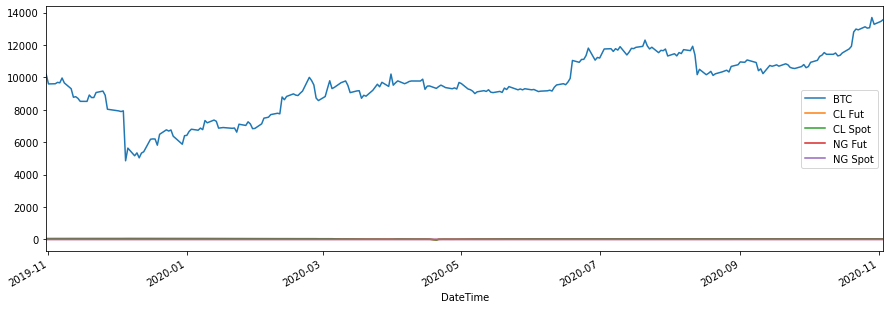

In [76]:
data_df.plot(figsize=(15,5))

<AxesSubplot:title={'center':'One Year Daily Percent Change, BTC and Energy'}, xlabel='DateTime'>

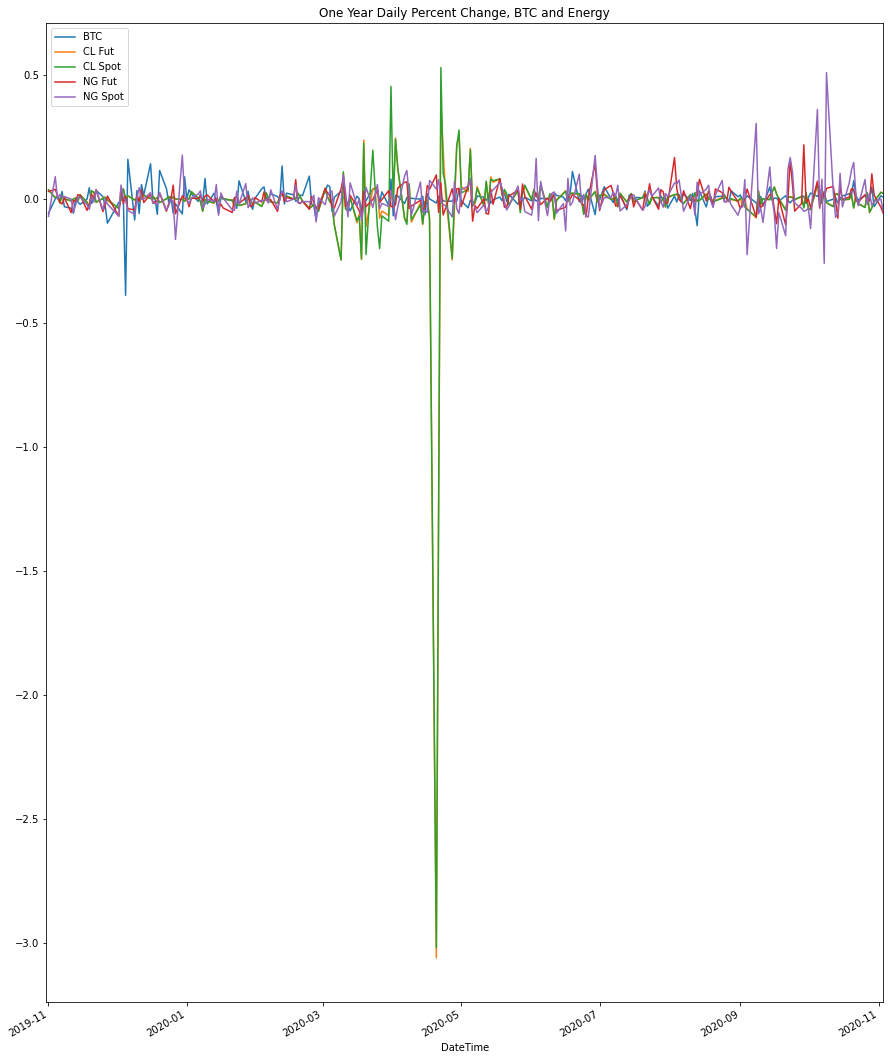

In [77]:
daily_returns = data_df.pct_change()
daily_returns.plot(figsize=(15,20), title="One Year Daily Percent Change, BTC and Energy")
# daily_returns.plot(figsize=(15,5))

<AxesSubplot:title={'center':'One Year Cumulative Returns, BTC and Energy'}, xlabel='DateTime'>

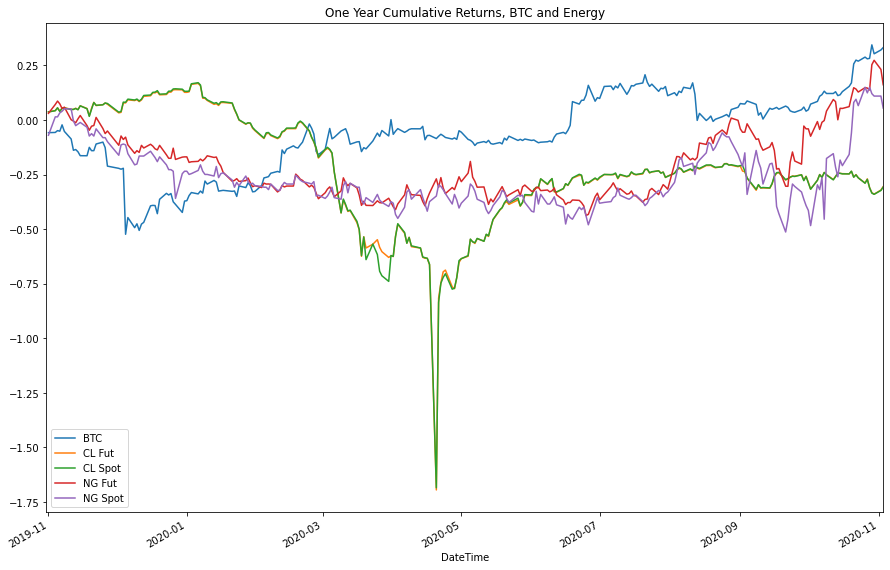

In [78]:
cumulative_returns = (1 + daily_returns).cumprod() - 1
cumulative_returns.plot(figsize=(15,10), title="One Year Cumulative Returns, BTC and Energy")

In [79]:
price_correlation = data_df.corr()
price_correlation

,BTC,CL Fut,CL Spot,NG Fut,NG Spot
BTC,1.000000,-0.434157,-0.430527,0.189825,0.057124
CL Fut,-0.434157,1.000000,0.998596,0.361482,0.424989
CL Spot,-0.430527,0.998596,1.000000,0.362142,0.422714
NG Fut,0.189825,0.361482,0.362142,1.000000,0.858898
NG Spot,0.057124,0.424989,0.422714,0.858898,1.000000


<AxesSubplot:>

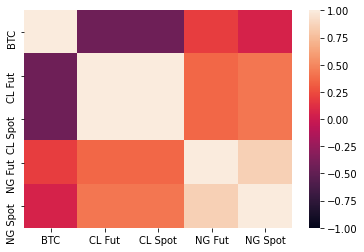

In [80]:
sns.heatmap(price_correlation, vmin=-1, vmax=1)

In [81]:
daily_returns_std = daily_returns.std()
daily_returns_std.sort_values(ascending=False)

CL Spot    0.216951
CL Fut     0.215626
NG Spot    0.073113
BTC        0.042138
NG Fut     0.041982
dtype: float64